$Campo\: Eléctrico\: 3D: \: Toroide\: - \: Corriente \: Alterna$

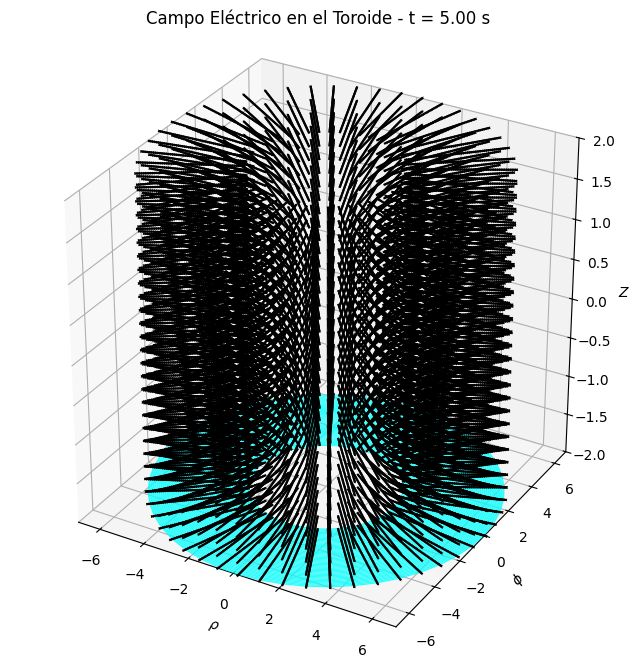

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Parámetros
R = 5  # Radio mayor
r = 2  # Radio menor
N = 50  # Número de vueltas
I0 = 1  # Amplitud
f = 60  # Frecuencia
mu0 = 4 * np.pi * 1e-7  # Permeabilidad del vacío
t_max = 5  # Tiempo máximo
dt = 0.1  # Timestep

# Mesh para las coordenadas del toroide
rho_toroide = np.linspace(R - r, R + r, 50)
phi_toroide = np.linspace(0, 2 * np.pi, 50)
z_toroide = np.linspace(-r, r, 25)
Rho, Phi, Z = np.meshgrid(rho_toroide, phi_toroide, z_toroide, indexing='ij')

X_toroide = Rho * np.cos(Phi)
Y_toroide = Rho * np.sin(Phi)

# Inicializar arrays para el campo eléctrico
Ex_all = np.zeros_like(X_toroide)
Ey_all = np.zeros_like(Y_toroide)
Ez_all = np.zeros_like(Z)

# Pasos de tiempo
time_steps = np.arange(0, t_max + dt, dt)

def update_electric_field(t):
    I = I0 * np.sin(2 * np.pi * f * t)
    dI_dt = 2 * np.pi * f * I0 * np.cos(2 * np.pi * f * t)

    E_rho = np.zeros_like(Rho)
    E_phi = np.zeros_like(Phi)
    E_z = np.zeros_like(Z)
    
    for i in range(np.size(Rho)):
        rho = Rho.ravel()[i]
        E_magnitude = (mu0 * N * dI_dt) / (2 * np.pi * rho)
        E_rho.ravel()[i] = E_magnitude
        E_phi.ravel()[i] = 0
        E_z.ravel()[i] = 0

    Ex = E_rho * np.cos(Phi) - E_phi * np.sin(Phi)
    Ey = E_rho * np.sin(Phi) + E_phi * np.cos(Phi)
    Ez = E_z

    Ex_all[:, :, :] = Ex
    Ey_all[:, :, :] = Ey
    Ez_all[:, :, :] = Ez

def animate_electric(t_idx):
    t = time_steps[t_idx]
    update_electric_field(t)
    
    ax.clear()
    ax.set_title(f'Campo Eléctrico en el Toroide - t = {t:.2f} s')
    ax.set_xlabel(r'$\rho$')
    ax.set_ylabel(r'$\phi$')
    ax.set_zlabel(r'$Z$')
    ax.set_box_aspect([1, 1, 1])

    ax.plot_surface(X_toroide[:, :, 0], Y_toroide[:, :, 0], Z[:, :, 0], facecolor='cyan', edgecolor='none', alpha=0.8)
    ax.quiver(X_toroide, Y_toroide, Z, Ex_all, Ey_all, Ez_all, color='k', length=0.1, normalize=True)

    ax.set_xlim([np.min(X_toroide), np.max(X_toroide)])
    ax.set_ylim([np.min(Y_toroide), np.max(Y_toroide)])
    ax.set_zlim([np.min(Z), np.max(Z)])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create animation
anim = FuncAnimation(fig, animate_electric, frames=len(time_steps), interval=100)

# Save animation as video file
writer = FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)
anim.save("E_Toro_AC.mp4", writer=writer)

# Show animation
plt.show()

# Keep reference to the animation
anim


$Campo\: de\: Inducción\: Magnética\: 3D: Toroide\: - \: Corriente \: Alterna$

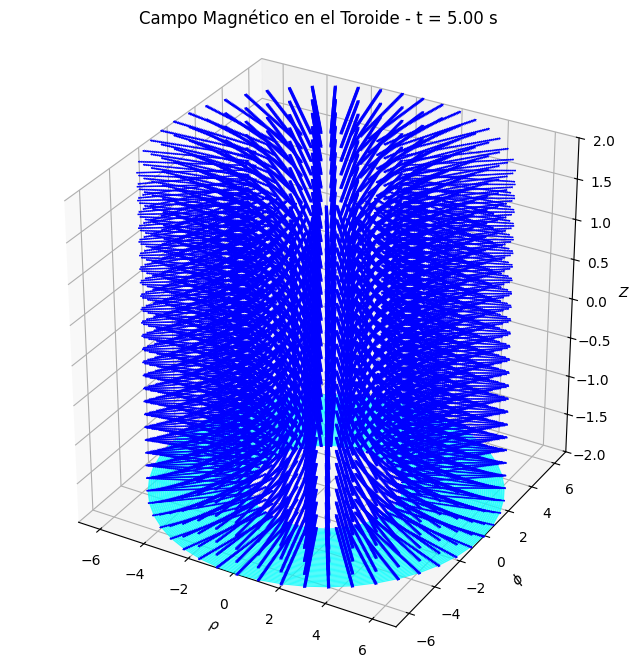

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Parámetros
R = 5  # Radio mayor
r = 2  # Radio menor
N = 50  # Número de vueltas
I0 = 1  # Amplitud
f = 60  # Frecuencia
mu0 = 4 * np.pi * 1e-7  # Permeabilidad del vacío
t_max = 5  # Tiempo máximo
dt = 0.1  # Timestep

# Mesh para las coordenadas del toroide
rho_toroide = np.linspace(R - r, R + r, 50)
phi_toroide = np.linspace(0, 2 * np.pi, 50)
z_toroide = np.linspace(-r, r, 25)
Rho, Phi, Z = np.meshgrid(rho_toroide, phi_toroide, z_toroide, indexing='ij')

X_toroide = Rho * np.cos(Phi)
Y_toroide = Rho * np.sin(Phi)

# Inicializar arrays para el campo magnético
Bx_all = np.zeros_like(X_toroide)
By_all = np.zeros_like(Y_toroide)
Bz_all = np.zeros_like(Z)

# Pasos de tiempo
time_steps = np.arange(0, t_max + dt, dt)

def update_magnetic_field(t):
    I = I0 * np.sin(2 * np.pi * f * t)

    B_rho = np.zeros_like(Rho)
    B_phi = np.zeros_like(Phi)
    B_z = np.zeros_like(Z)
    
    for i in range(np.size(Rho)):
        rho = Rho.ravel()[i]
        B_magnitude = (mu0 * N * I) / (2 * np.pi * rho)
        B_rho.ravel()[i] = 0
        B_phi.ravel()[i] = B_magnitude
        B_z.ravel()[i] = 0

    Bx = B_rho * np.cos(Phi) - B_phi * np.sin(Phi)
    By = B_rho * np.sin(Phi) + B_phi * np.cos(Phi)
    Bz = B_z

    Bx_all[:, :, :] = Bx
    By_all[:, :, :] = By
    Bz_all[:, :, :] = Bz

def animate_magnetic(t_idx):
    t = time_steps[t_idx]
    update_magnetic_field(t)
    
    ax.clear()
    ax.set_title(f'Campo Magnético en el Toroide - t = {t:.2f} s')
    ax.set_xlabel(r'$\rho$')
    ax.set_ylabel(r'$\phi$')
    ax.set_zlabel(r'$Z$')
    ax.set_box_aspect([1, 1, 1])

    ax.plot_surface(X_toroide[:, :, 0], Y_toroide[:, :, 0], Z[:, :, 0], facecolor='cyan', edgecolor='none', alpha=0.8)
    ax.quiver(X_toroide, Y_toroide, Z, Bx_all, By_all, Bz_all, color='b', length=0.1, normalize=True)

    ax.set_xlim([np.min(X_toroide), np.max(X_toroide)])
    ax.set_ylim([np.min(Y_toroide), np.max(Y_toroide)])
    ax.set_zlim([np.min(Z), np.max(Z)])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create animation
anim = FuncAnimation(fig, animate_magnetic, frames=len(time_steps), interval=100)

# Save animation as video file
writer = FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)
anim.save("B_Toro_AC.mp4", writer=writer)

# Show animation
plt.show()

# Keep reference to the animation
anim
